# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('C:/DS/Springboard/EDA_human_temperature/data/human_body_temperature.csv')

In [23]:
# Your work here.
print(len(df))
print(df.isna().sum())
df.head()

130
temperature    0
gender         0
heart_rate     0
dtype: int64


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [18]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np


In [19]:
mu = df['temperature'].mean()
sigma = np.sqrt(df['temperature'].var()) 

print(mu)
print(sigma)

98.24923076923078
0.7331831580389454


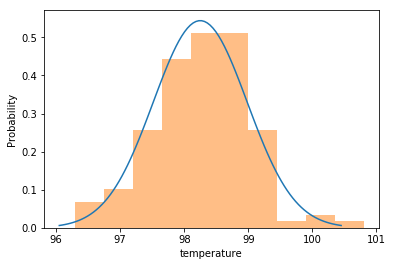

In [20]:
#graphical check of normality
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.hist(df['temperature'],bins=10,normed=True,alpha=0.5)
plt.xlabel('temperature')
plt.ylabel('Probability')
plt.show()

In [49]:
#back of envelope test
def norm_test(data,n):
    mu = np.mean(data)
    sigma = np.std(data)
    prop =  1 - (np.sum(data > mu + sigma*n) + np.sum(data < mu - sigma*n))/len(data)
    return prop

obs_sigma1 = norm_test(df['temperature'].values,1)
obs_sigma2 = norm_test(df['temperature'].values,2)
obs_sigma3 = norm_test(df['temperature'].values,3)
print(obs_sigma1)
print(obs_sigma2)
print(obs_sigma3)

# since the observed probability are close to the 68-95-99.7% target and graphical check of histogram is close to bell shape, 
# this distribution is normal distribution 

0.6923076923076923
0.9461538461538461
0.9923076923076923


In [51]:
# use scipy to test normality
import scipy.stats as stats
stats.normaltest(df["temperature"])
# since pvalue is not small, cannot reject the null hypothesis of normal distribution

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

# Answer to Q1

Based on graphical check, back of envelope test and scipy normal test, the sample is normally distributed

# Answer to Q2:
1. sample size is 130, which is large
2. it should be less than 10% of the total population, so it is safe to assume the temperature sample is random and independent 

In [52]:
# bootstrapp hypothesis test
# assume the true mean is 98.6
trans_temp = df['temperature'] - df['temperature'].mean() + 98.6
rep_mean = np.empty(10000)
np.random.seed(10)
for i in range(10000):
    bs_temp = np.random.choice(trans_temp,len(df['temperature']))
    rep_mean[i] = bs_temp.mean()
p = np.sum(rep_mean <= df['temperature'].mean())/10000
print(p)
# the low p value suggests the null hypothesis is false, meaning the true mean temperature is not 98.6F

0.0


In [56]:
# I would use one-sample test, since 98.6 is only one value
# since sample size is large, it is safe to use z-test for approximation 
# experiment 1: assume sample standard deviation approximately equal to that of population
z = (df['temperature'].mean()-98.6)/(df['temperature'].std()/np.sqrt(130))
print(z)
# calculate p-value based on z table
# since calculated z is less than the smallest in z table
pvalue < 0.0003 
# therefore 98.6 is not the true normal temperature

-5.454823292364079


In [57]:
# experiment 2: use bootstrap to generate population standard deviation
bs_std = np.empty(1000)
for i in range(1000):
    bs_sample = np.random.choice(df['temperature'],size=len(df['temperature']))
    bs_std[i] = np.std(bs_sample)
pop_std = bs_std.mean()
z_star = (df['temperature'].mean()-98.6)/(pop_std/np.sqrt(130))
print(z_star)
# z score using population standard deviation is close to the z score using sample standard deviation for approximation
# p value < 0.0003
# conclusion remains the same

-5.522290981353405


In [58]:
# t test is also appropriate, since we don't have information on the standard deviation of true population
import math 
t = (df['temperature'].mean()-98.6)/(df['temperature'].std()/np.sqrt(130))
print(t)
# degree of freedom 129, the t level is ~ 3.35 for p value of 0.0005
# since the calculated t level is smaller than 3.35 so the p-value is less than 0.0005
# the null hypothesis is not true, and true mean is not 98.6

-5.454823292364079


# Answer to Q3

Based on bootstrap, z-test and t-test, conclusion remains consistent and 98.6 is not the true nromal temperature

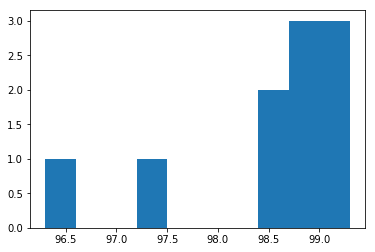

In [81]:
# draw 10 sample from the original sample
np.random.seed(10)
t_10 = np.random.choice(df['temperature'],size=10)
plt.hist(t_10)
plt.show()

In [76]:
# bootstrapping of 10 size sample
trans_temp = t_10 - t_10.mean() + 98.6
rep_mean = np.empty(10000)
for i in range(10000):
    bs_temp = np.random.choice(trans_temp,len(t_10))
    rep_mean[i] = bs_temp.mean()
p = np.sum(rep_mean <= t_10.mean())/10000
print(p)
# since p-value is not small, cannot reject the null hypothesis that 98.6 is the true normal temperature

0.2609


In [77]:
# t-test of 10 size sample
t = (t_10.mean() - 98.6)/(t_10.std()/np.sqrt(10))
print(t)
# with degree of freedom at 9,t level of -0.6 means a p-value around 0.3 for one-tail test 
# it means cannot reject the null hypothesis that 98.6 is the true normal temperature

-0.5980209079213772


In [78]:
import scipy
t_stats = scipy.stats.ttest_1samp(t_10, 98.6)
t_stats
# t test from scipy gives a pvalue of 0.58, cannot reject null hypothesis

Ttest_1sampResult(statistic=-0.5673324472300146, pvalue=0.5843598014763095)

In [79]:
# z-test of 10 size sample
z = (t_10.mean() - 98.6)/(t_10.std()/np.sqrt(10))
print(z)
# z value -0.6 means a p-value around 0.27, cannot reject the null hypothesis

-0.5980209079213772


# Answer to Q4: 
1. when sample size is small, t-test should be used
2. t-test/z-test/bootstrapping all conclude cannot reject the null hypothesis
3. this is mainly because the small sample size makes the sample not normal distribution anymore 
4. p-value from t-test is higher than that from z-test, since z-test needs to approximately use sample standard deviation to substitude population standard deviation, and that approximation is reasonable only when sample size is large

In [38]:
# abnormal temperature range using bootstrapping
rep_low = np.empty(10000)
rep_high = np.empty(10000)
for i in range(10000):
    bs_temp = np.random.choice(df['temperature'],len(df['temperature']))
    rep_low[i] = np.percentile(bs_temp,2.5)
    rep_high[i] = np.percentile(bs_temp,97.5)
# use median of bootstrap low and high value to avoid influence of outliers
temp_low = np.percentile(rep_low,50)
temp_high = np.percentile(rep_high,50)

print("temperature lower than ",temp_low," or higher than ",temp_high, "can be considered abnormal")

temperature lower than  96.7225  or higher than  99.4775 can be considered abnormal


In [82]:
# abnormal temperature range using z-test
# 95% confidence interval
# z-value of two-tail table at degree of freedom is ~ 1.98
# margin of error 
sigma_s = df['temperature'].std()
t_low = df['temperature'].mean() - 1.98*sigma_s
t_high = df['temperature'].mean() + 1.98*sigma_s
print("temperature lower than ",t_low," or higher than ",t_high, "can be considered abnormal based on z-test")

temperature lower than  96.79752811631367  or higher than  99.70093342214788 can be considered abnormal based on z-test


# Answer to Q5
1. bootstrap shows temperature lower than  96.7225  or higher than  99.4775 can be considered abnormal
2. z-test shows temperature lower than  96.79752811631367  or higher than  99.70093342214788 can be considered abnormal 

In [45]:
# Answer to Q6
# Use 2-sample bootstrap test to check if the normal temperature of male and female different
# null hypothesis: mean temperatures of males and females are the same
m_temp = df[df['gender'] == 'M']['temperature']
f_temp = df[df['gender'] == 'F']['temperature']
obs_dif = m_temp.mean() - f_temp.mean()
total_mean = df['temperature'].mean()
trans_m = m_temp - m_temp.mean() + total_mean
trans_f = f_temp - f_temp.mean() + total_mean
rep_dif = np.empty(10000)
for i in range(10000):
    bs_m = np.random.choice(trans_m,len(trans_m))
    bs_f = np.random.choice(trans_f,len(trans_f))
    rep_dif[i] = bs_m.mean() - bs_f.mean()
p_value = np.sum(rep_dif <= obs_dif)/len(rep_dif)
print(p_value)



0.012


In [48]:
# alternative without using shifting
m_temp = df[df['gender'] == 'M']['temperature']
f_temp = df[df['gender'] == 'F']['temperature']
obs_dif = m_temp.mean() - f_temp.mean()
rep_dif = np.empty(10000)
for i in range(10000):
    bs_m = np.random.choice(m_temp,len(m_temp))
    bs_f = np.random.choice(f_temp,len(f_temp))
    rep_dif[i] = bs_m.mean() - bs_f.mean()
p_value = np.sum(rep_dif > 0)/len(rep_dif)
print(p_value)


0.012


In [85]:
# alternative using 2-sample z-test
print(len(m_temp))
print(len(f_temp))
# two samples have same length
# for 95% confidence interval, z need to be larger than 1.96 to reject null hypothesis
z = (m_temp.mean()-f_temp.mean())/np.sqrt(((m_temp.std())**2)/len(m_temp) + ((f_temp.std())**2)/len(f_temp))
print(z)
p_value = 0.01 # based on z table

65
65
-2.285434538165274


# Answer to Q6
1. Use 2-sample bootstrap test and resulting p-value is small (0.012) than the 0.05 threshold of 95% confidence interval. Therefore, the null hypothesis is not true and normal temperatures of males and females are different
2. 2-sample z-test also yields a small p-value (0.01) and rejects the null hypothesis
3. Mean normal body temperature is not 98.6F based on analysis of the sample data. And the value differs between males and females.